In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [ ]:
(train, _), (test, _) = mnist.load_data()
train = train.astype('float32') / 255.
test = test.astype('float32') / 255.
train = np.reshape(train, (len(train), 28, 28, 1))
test = np.reshape(test, (len(test), 28, 28, 1))

Побудова моделі автокодувальника

In [ ]:
autoencoder = Sequential()

autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


Навчання моделі

In [ ]:
history = autoencoder.fit(train, train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(test, test))


Epoch 1/50
469/469 [==============================] - 111s 233ms/step - loss: 0.1963 - val_loss: 0.1369
Epoch 2/50
469/469 [==============================] - 107s 229ms/step - loss: 0.1278 - val_loss: 0.1200
Epoch 3/50
469/469 [==============================] - 106s 226ms/step - loss: 0.1165 - val_loss: 0.1113
Epoch 4/50
469/469 [==============================] - 106s 227ms/step - loss: 0.1105 - val_loss: 0.1068
Epoch 5/50
469/469 [==============================] - 106s 226ms/step - loss: 0.1065 - val_loss: 0.1035
Epoch 6/50
469/469 [==============================] - 105s 223ms/step - loss: 0.1036 - val_loss: 0.1020
Epoch 7/50
469/469 [==============================] - 103s 219ms/step - loss: 0.1012 - val_loss: 0.0989
Epoch 8/50
469/469 [==============================] - 105s 223ms/step - loss: 0.0993 - val_loss: 0.0971
Epoch 9/50
469/469 [==============================] - 103s 219ms/step - loss: 0.0977 - val_loss: 0.0958
Epoch 10/50
469/469 [==============================] - 103s 220m

Графік

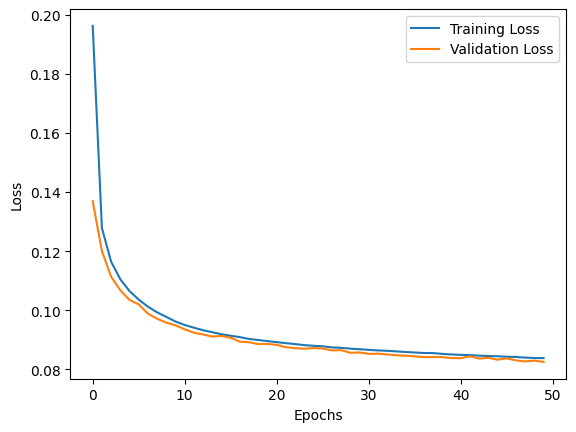

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 [==============================] - 7s 20ms/step


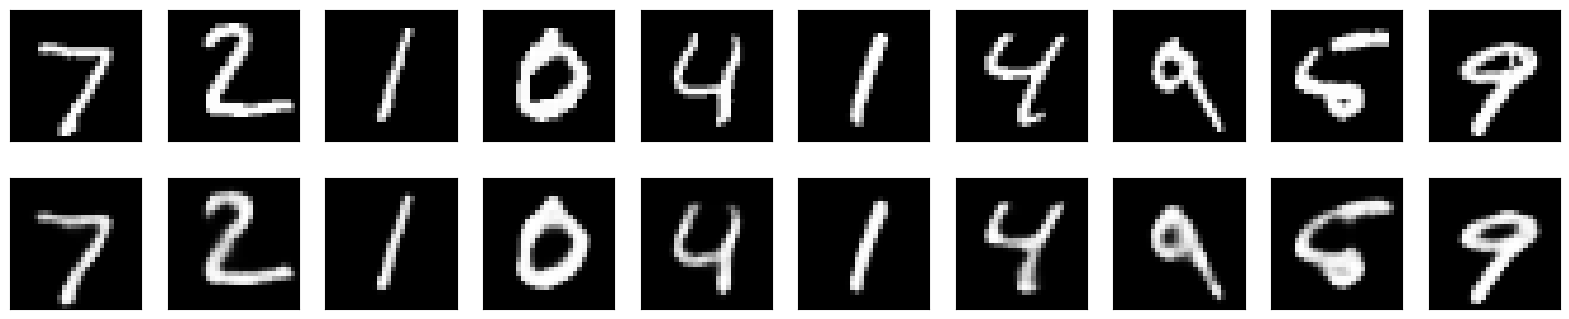

In [ ]:
decoded_imgs = autoencoder.predict(test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()